In [2]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ReduceLROnPlateau
from numpy import array
from numpy.random import uniform
from numpy import hstack
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas
from scipy import signal
import copy
from sklearn.preprocessing import StandardScaler
from livelossplot import PlotLossesKeras

In [3]:
def create_data(n):
 x1 = array([i/100+uniform(-1,3) for i in range(n)]).reshape(n,1)
 x2 = array([i/100+uniform(-3,5)+2 for i in range(n)]).reshape(n,1)
 x3 = array([i/100+uniform(-6,5)-3 for i in range(n)]).reshape(n,1)

 y1= [x1[i]-x2[i]+x3[i]+uniform(-2,2) for i in range(n)]
 y2= [x1[i]+x2[i]-x3[i]+5+uniform(-1,3) for i in range(n)]
 X = hstack((x1, x2, x3))
 Y = hstack((y1, y2))
 return X, Y

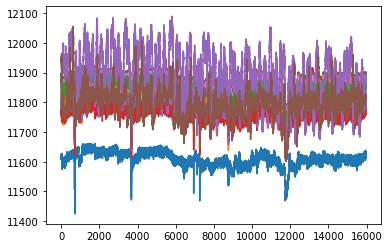

(15949, 16)
[[11801. 11759. 11848. ... 11788. 11780. 11909.]
 [11805. 11776. 11854. ... 11777. 11786. 11936.]
 [11796. 11766. 11846. ... 11776. 11787. 11943.]
 ...
 [11800. 11790. 11832. ... 11766. 11871. 11817.]
 [11818. 11792. 11837. ... 11774. 11894. 11827.]
 [11801. 11778. 11855. ... 11756. 11884. 11822.]]


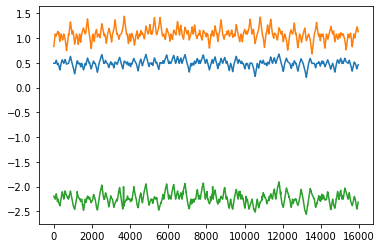

(15949, 3)
[[ 0.492022  0.830763 -2.1948  ]
 [ 0.492122  0.834665 -2.1958  ]
 [ 0.492211  0.837899 -2.1967  ]
 ...
 [ 0.460441  1.13144  -2.32    ]
 [ 0.461299  1.13005  -2.3181  ]
 [ 0.462713  1.12809  -2.3155  ]]


In [21]:
# x, y = create_data(n=400)

# df = pandas.read_csv("50moves.csv", sep=',', header=1)
# dataset = df.values
# trim_start = 200
# trim_end = 8400
# x = dataset[trim_start:trim_end,-16:]
# y = dataset[trim_start:trim_end,5:8]

df = pandas.read_csv("100moves.csv", sep=',', header=1)
dataset = df.values
trim = 300
x = dataset[trim:-trim,-16:]
y = dataset[trim:-trim,5:8]

# x = x.transpose()
# x_filtered = np.array([butter_lowpass_filter(d, 1, 1.5) for d in x])

# x = x_filtered.transpose()
plt.plot(x)
plt.show()
print(x.shape)
print(x)

# x = copy.copy(x_filtered)

plt.plot(y)
plt.show()
print(y.shape)
print(y)

In [22]:
x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y)
print(x)
print(y)
x = x.reshape(x.shape[0], x.shape[1], 1)
print("x:", x.shape, "y:", y.shape)


[[ 0.27276651 -0.20578333  0.5876367  ...  1.23494114 -1.22602275
   2.17496319]
 [ 0.43650598  0.49009279  0.80979561 ...  0.76069427 -1.15871383
   2.71726268]
 [ 0.06809217  0.0807539   0.51358373 ...  0.71758091 -1.14749567
   2.85785884]
 ...
 [ 0.23183164  1.06316725 -0.00478705 ...  0.28644739 -0.20517074
   0.3271279 ]
 [ 0.96865927  1.14503503  0.18034537 ...  0.63135421  0.0528468
   0.52797957]
 [ 0.27276651  0.57196057  0.84682209 ... -0.14468613 -0.05933474
   0.42755373]]
[[-0.0208669  -2.22906626  0.413577  ]
 [-0.01945385 -2.19419172  0.40469291]
 [-0.01819624 -2.1652875   0.39669724]
 ...
 [-0.46712246  0.45826618 -0.69871007]
 [-0.45499848  0.44584291 -0.68183032]
 [-0.43501795  0.4283252  -0.6587317 ]]
x: (15949, 16, 1) y: (15949, 3)


In [7]:
in_dim = (x.shape[1], x.shape[2])
out_dim = y.shape[1]
print(in_dim)
print(out_dim)

(16, 1)
3


In [8]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.25)
print("xtrain:", xtrain.shape, "ytrian:", ytrain.shape)

xtrain: (11961, 16, 1) ytrian: (11961, 3)


In [9]:
model = Sequential()
model.add(LSTM(10, input_shape=in_dim, activation="relu"))
# model.add(LSTM(32))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 3)                 33        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


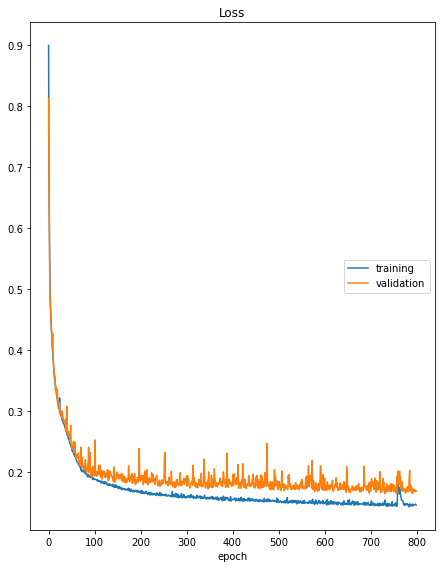

Loss
	training         	 (min:    0.143, max:    0.899, cur:    0.145)
	validation       	 (min:    0.164, max:    0.813, cur:    0.168)


In [10]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=800, batch_size=12, verbose=0, callbacks=[PlotLossesKeras()]) #callbacks=[reduce_lr]

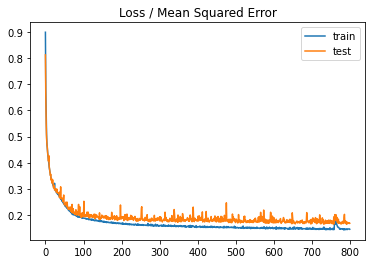

In [12]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [13]:
ypred = model.predict(xtest)
print("y1 MSE:%.4f" % mean_squared_error(ytest[:,0], ypred[:,0]))
print("y2 MSE:%.4f" % mean_squared_error(ytest[:,1], ypred[:,1]))
print("y3 MSE:%.4f" % mean_squared_error(ytest[:,2], ypred[:,2]))

y1 MSE:0.1754
y2 MSE:0.1339
y3 MSE:0.1949


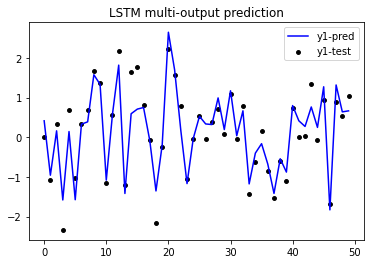

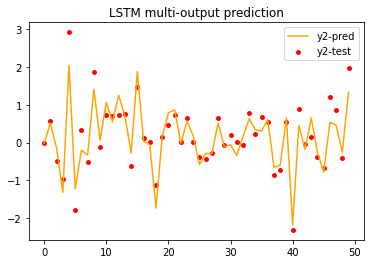

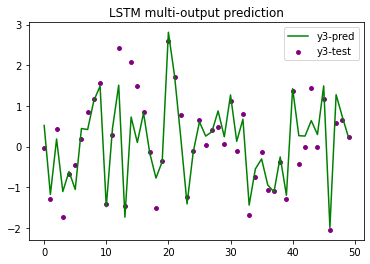

In [16]:
N = 50
x_ax = range(len(xtest))[:N]

plt.title("LSTM multi-output prediction")
plt.scatter(x_ax, ytest[:N,0],  s=15, label="y1-test", color='black')
plt.plot(x_ax, ypred[:N,0], label="y1-pred", color='blue')
plt.legend()
plt.show()

plt.title("LSTM multi-output prediction")
plt.scatter(x_ax, ytest[:N,1],  s=15, label="y2-test", color='red')
plt.plot(x_ax, ypred[:N,1], label="y2-pred", color='orange')
plt.legend()
plt.show()

plt.title("LSTM multi-output prediction")
plt.scatter(x_ax, ytest[:N,2],  s=15, label="y3-test", color='purple')
plt.plot(x_ax, ypred[:N,2], label="y3-pred", color='green')
plt.legend()
plt.show()

In [24]:
print(xtest)
# print(ytest[:N,0])
# print(ytest[:N,1])
# print(ytest[:N,2])

[[[ 0.9277244 ]
  [ 0.69476224]
  [ 0.40250428]
  ...
  [ 0.11399398]
  [ 0.43426403]
  [-0.99849306]]

 [[ 1.25520334]
  [ 0.65382835]
  [ 0.03223944]
  ...
  [ 1.14871443]
  [ 0.18746464]
  [ 0.5681499 ]]

 [[ 0.55931059]
  [ 0.4491589 ]
  [ 0.18034537]
  ...
  [ 0.24333404]
  [ 1.33171634]
  [ 0.22670207]]

 ...

 [[ 0.84585466]
  [ 0.89943169]
  [ 0.69871615]
  ...
  [ 1.01937438]
  [ 0.64740895]
  [-0.03440509]]

 [[-0.83247492]
  [-0.61512223]
  [-0.93044915]
  ...
  [-1.09317987]
  [ 0.04162864]
  [-0.71730074]]

 [[ 1.17333361]
  [ 1.30877059]
  [ 1.36519287]
  ...
  [ 0.97626103]
  [-0.37344305]
  [ 0.96985322]]]
